<a href="https://colab.research.google.com/github/charlieswb/Learning/blob/master/Tensorflow/LogisticRegression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense

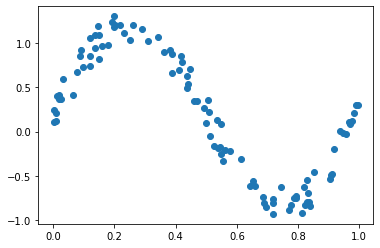

In [2]:
N = 100
X = np.random.rand(N, 1)
Y = np.sin(2 * np.pi * X) + 0.4 * np.random.rand(N, 1)
plt.scatter(X, Y)
plt.show()

Create Model

In [14]:
# 1--100-100--1
inputs = Input(shape=(1,))
l1 = Dense(100, activation='relu')
l2 = Dense(100, activation='relu')
l3 = Dense(1)
outputs = l3(l2(l1(inputs)))

In [15]:
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())

Train

In [16]:
model.fit(X, Y, batch_size=32, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 0.4556
Epoch 2/500
4/4 [==============================] - 0s 2ms/step - loss: 0.4170
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 0.3339
Epoch 4/500
4/4 [==============================] - 0s 2ms/step - loss: 0.3315
Epoch 5/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2819
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2372
Epoch 7/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2285
Epoch 8/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2455
Epoch 9/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2065
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2314
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 0.2951
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 0.1884
Epoch 13/500
4/4 [==============================] - 0s 2ms/st

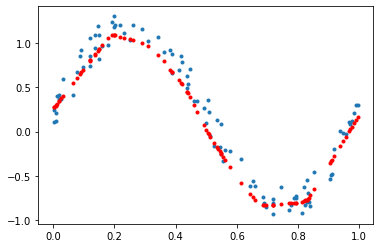

In [17]:
Z = model.predict(X)
plt.plot(X, Y, '.')
plt.plot(X, Z, '.r')
plt.show()

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[:, 0:4].values
Y = pd.get_dummies(df.iloc[:, -1]).values
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=33)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [28]:
# 4--100-100--3
def create_model():
  inputs = Input(shape=(4,))
  l1 = Dense(100, activation='relu')
  l2 = Dense(100, activation='relu')
  l3 = Dense(3)
  outputs = l3(l2(l1(inputs)))
  model = keras.Model(inputs, outputs)
  model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1), loss=keras.losses.MeanSquaredError())
  return model

In [30]:
model = create_model()
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
3/3 [==============================] - 0s 2ms/step - loss: 9.3136
Epoch 2/500
3/3 [==============================] - 0s 2ms/step - loss: 1.3529
Epoch 3/500
3/3 [==============================] - 0s 4ms/step - loss: 0.2337
Epoch 4/500
3/3 [==============================] - 0s 3ms/step - loss: 0.1974
Epoch 5/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1707
Epoch 6/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1523
Epoch 7/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1410
Epoch 8/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1268
Epoch 9/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1179
Epoch 10/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1132
Epoch 11/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1074
Epoch 12/500
3/3 [==============================] - 0s 2ms/step - loss: 0.1027
Epoch 13/500
3/3 [==============================] - 0s 2ms/st

In [32]:
print('loss:', model.evaluate(X_test, Y_test))

3/3 [==============================] - 0s 2ms/step - loss: 0.0206
accuracy: 0.02058662846684456


Try KFold

In [41]:
from sklearn.model_selection import KFold

K = 2

best_model_loss = 1

for train_index,test_index in KFold(K).split(X):
  X_train, X_test = X[train_index], X[test_index]
  Y_train, Y_test = Y[train_index], Y[test_index]
  
  model_iris = create_model()
  model_iris.fit(X_train, Y_train, epochs=500, verbose=0)
  
  loss = model_iris.evaluate(X_test, Y_test)
  if loss < best_model_loss:
    best_model = model_iris
    best_model_loss = loss
  print('loss:', loss)

3/3 [==============================] - 0s 2ms/step - loss: 0.6358
loss: 0.6357742547988892
3/3 [==============================] - 0s 2ms/step - loss: 0.5861
loss: 0.5860563516616821


In [42]:
best_model_loss

0.5860563516616821